In [1]:
import pandas as pd
import numpy as np
import spacy
import spacy.lang.en.stop_words as STOP_WORDS
import nltk

In [2]:
(spacy.__version__)

'2.2.4'

In [3]:
(nltk.__version__)

'3.4.4'

Download : https://www.kaggle.com/kazanova/sentiment140/kernels

### Load the Data

In [4]:
df = pd.read_csv('twitter16m.csv', encoding='latin1' ,  header= None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.shape

(1600000, 6)

In [6]:
df = df[[5,0]]
df.columns =['twitts', 'sentiment']

In [7]:
df.head()

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [8]:
df.columns

Index(['twitts', 'sentiment'], dtype='object')

In [9]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [10]:
sent_map = {0: 'negative', 4: 'positive'}

### Word Counts

In [11]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [12]:
df.head()

,twitts,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


### char counts

In [13]:
df['char_counts'] = df['twitts'].apply(lambda x: len(x))

df.head()

,twitts,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


### Avg word Length

In [14]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len / len(words)  # len(x) / len(words)   

In [15]:
df['avg_word_len'] = df['twitts'].apply(lambda x: get_avg_word_len(x))

In [16]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


In [17]:
#! python -m spacy download en_core_web_sm

In [18]:
#! python -m spacy download en_core_web_lg

In [19]:
#! python -m spacy download en_core_web_md 

In [20]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(spacy_stopwords))
print('First ten stop words: %s' % list(spacy_stopwords)[:10])

Number of stop words: 326
First ten stop words: ['herein', 'towards', 'latter', 'often', 'so', 'neither', 'side', 'down', 'out', 'much']


### STOP WORDS

In [21]:
print(spacy_stopwords)

{'herein', 'towards', 'latter', 'often', 'so', 'neither', 'side', 'down', 'out', 'much', 'seemed', 'against', 'across', 'themselves', 'thereby', 'top', 'everything', 'least', 'name', "'re", 'there', 'those', 'however', 'indeed', 'since', 'beside', 'bottom', 'its', 'fifteen', 'really', 'wherein', 'also', 'anything', 'six', 'seeming', 'on', 'n‘t', 'twelve', 'over', 'behind', 'very', 'next', 'therein', 'though', 'do', 'you', 'seem', 'quite', 'other', 'whether', 'yourself', 'hence', 'third', 'say', 'around', 'this', '’d', 'yours', 'of', 'someone', 'everyone', '‘s', 'part', 'during', 'ten', 'ever', 'not', 'get', 'a', 'already', "'ll", 'beyond', 'nine', 'nowhere', 'been', 'any', 'seems', 'serious', 'into', 'whereafter', 'own', 'alone', 'namely', 'due', 'twenty', "n't", 'doing', 'sometime', 'rather', 'now', 'see', 'many', 'are', 'full', 'about', 'he', 'mostly', 'wherever', '’ve', 'whatever', 'either', 'off', 'itself', 'become', 'somewhere', 'each', 'anyway', 'first', 'always', 'former', 'unti

In [22]:
x = 'this is text data'

In [23]:
[t for t in x.split() if t in x]

['this', 'is', 'text', 'data']

In [24]:
# df['twitts'].apply(lambda x: len([t for t in x.split() if t in spacy_stopwords] ))

In [25]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in spacy_stopwords] ))

In [26]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


### Count # and @

In [27]:
x = "this has #hash and @mentions"

[t for t in x.split() if t.startswith ('#') or t.startswith ('@')]

['#hash', '@mentions']

In [28]:
df['#hash_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith ('#')] ))

In [29]:
df['@mentions_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith ('@')] ))

In [30]:
df.tail()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts
1599995,Just woke up. Having no school is the best fee...,4,11,56,4.090909,4,0,0
1599996,TheWDB.com - Very cool to hear old Walt interv...,4,11,78,6.090909,1,0,0
1599997,Are you ready for your MoJo Makeover? Ask me f...,4,11,57,4.181818,5,0,0
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4,12,65,4.416667,3,0,0
1599999,happy #charitytuesday @theNSPCC @SparksCharity...,4,5,62,11.400000,0,1,3


### if numeric Digit in twitts

In [31]:
df['numeric_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()] ))

In [32]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


### Upper word counts

In [33]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()] ))

In [34]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [35]:
df.loc[8]['twitts']

"@Tatiana_K nope they didn't have it "

## Preprocessing and Cleaning

In [36]:
df['twitts'] = df['twitts'].apply(lambda x:  x.lower() )

In [37]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


### Contraction to Expansion

In [38]:
contractions = { 
"ain't": "are not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
" u ": " you ",
" ur ": " your ",
" n ": " and "
}

In [39]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [40]:
x1 = "hi, i'd be happy"

In [41]:
cont_to_exp(x1)

'hi, i would be happy'

In [42]:
df['twitts'] = df['twitts'].apply(lambda x:  cont_to_exp(x) )

df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,1


In [43]:
df.loc[33]['twitts']

'@julieebaby awe i love you too!!!! 1 am here  i miss you'

### Count and Remove Email

In [44]:
import re

In [45]:
x1 = 'hi, mail me at good@gmail.com or bad@gamil.com'

In [46]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x1)

['good@gmail.com', 'bad@gamil.com']

In [47]:
df['email'] = df['twitts'].apply(lambda x:  re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x) )

df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[]
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[]
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[]
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[]
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,1,[]


In [48]:
df['email'].value_counts()

[]                                                               1599436
[gmail_all@mail.ru]                                                    4
[fuseboxradio@gmail.com]                                               4
[kumailht@gmail.com]                                                   3
[we_can_help@cable.comcast.com]                                        2
[neenz@alltop.com]                                                     2
[emileevitrano@gmail.com]                                              2
[littlemissgnahhh@hotmail.com]                                         2
[25_scala_a@live.it]                                                   2
[amywoodtv@gmail.com]                                                  2
[vic@releasing.net]                                                    2
[closes@11...on]                                                       2
[closes@11...i]                                                        2
[michael.hansen@zendesk.com]                       

In [49]:
df['email_counts'] = df['email'].apply(lambda x:  len(x) )

df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,1,[],0


In [50]:
df[df['email_counts']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that has / that is kinda sa...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1
72386,"madonnafae ok, i found this on a fluff page~ e...",0,22,136,5.000000,9,0,0,0,0,[nrqj8ga@facebook.com],1
74295,@lovetoblog i cannot dm you my email cos you a...,0,16,105,5.562500,6,0,1,0,2,[danielleloren@live.co.uk],1
87268,but...@floppyflopsome...cannot you come for ju...,0,13,89,5.846154,6,0,0,0,1,[but...@floppyflopsome...cannot],1
93116,@manycolors kyle@braket.us,0,2,27,12.500000,0,0,1,0,0,[kyle@braket.us],1
120116,@thetenderoni can you forward the applestore p...,0,21,136,5.476190,10,0,1,0,0,[cmanisouk@yahoo.com],1


In [51]:
x1

'hi, mail me at good@gmail.com or bad@gamil.com'

In [52]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','', x1)

'hi, mail me at  or '

In [53]:
df['twitts'] = df['twitts'].apply(lambda x:  re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','', x) )

df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,1,[],0


In [54]:
df[df['email_counts']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that has / that is kinda sa...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1
72386,"madonnafae ok, i found this on a fluff page~ e...",0,22,136,5.000000,9,0,0,0,0,[nrqj8ga@facebook.com],1
74295,@lovetoblog i cannot dm you my email cos you a...,0,16,105,5.562500,6,0,1,0,2,[danielleloren@live.co.uk],1
87268,you come for just one weekend? ps. i am so c...,0,13,89,5.846154,6,0,0,0,1,[but...@floppyflopsome...cannot],1
93116,@manycolors,0,2,27,12.500000,0,0,1,0,0,[kyle@braket.us],1
120116,@thetenderoni can you forward the applestore p...,0,21,136,5.476190,10,0,1,0,0,[cmanisouk@yahoo.com],1


### Count URL and remove it

In [55]:
x2 = 'hi, to watch to visit https://youtube.com/mugeshraja'

In [56]:
re.findall(r'(http|https|ftp)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x2)

[('https', 'youtube.com', '/mugeshraja')]

In [57]:
df['URL_flag'] = df['twitts'].apply(lambda x:  len(re.findall(r'(http|https|ftp)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [58]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts,URL_flag
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,1,[],0,0


### Remove RT

In [59]:
df['twitts'] = df['twitts'].apply(lambda x:  re.sub("RT", "", x) )

In [60]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts,URL_flag
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,1,[],0,0


### special char removal and punctuation 

In [61]:
df['twitts'] = df['twitts'].apply(lambda x:  re.sub('[^A-Z a-z 0-9-]+','', x) )

In [62]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts,URL_flag
0,switchfoot httptwitpiccom2y1zl - awww that has...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it has it is not behaving ...,0,21,111,4.285714,10,0,1,0,1,[],0,0


### Removal the spaces 

In [63]:
x2= "hi,   how  are   you"

In [64]:
" ".join(x2.split())

'hi, how are you'

In [65]:
df['twitts'] = df['twitts'].apply(lambda x:  " ".join(x.split() ))

In [66]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts,URL_flag
0,switchfoot httptwitpiccom2y1zl - awww that has...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it has it is not behaving a...,0,21,111,4.285714,10,0,1,0,1,[],0,0


### Remove HTML tages 

In [67]:
from bs4 import BeautifulSoup

In [68]:
x2 = "<html><h2>Thanks fo watchng</h2><html>"

In [69]:
BeautifulSoup(x2, 'lxml').get_text()

'Thanks fo watchng'

In [70]:
df['twitts'] = df['twitts'].apply(lambda x:  BeautifulSoup(x, 'lxml').get_text() )

In [71]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts,URL_flag
0,switchfoot httptwitpiccom2y1zl - awww that has...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it has it is not behaving a...,0,21,111,4.285714,10,0,1,0,1,[],0,0


### Remove Accented char

In [72]:
import unicodedata

x2 = 'Málaga'

In [73]:
def remove_accents(x2):
    x = unicodedata.normalize('NFKD', x2).encode('ASCII', 'ignore').decode('utf-8', 'ignore')
    return x

In [74]:
remove_accents(x2)

'Malaga'

### Spacy and NLP

#### Remove Stop words

In [75]:
import spacy

In [76]:
x2 = "this is stop words removal"

In [77]:
" ".join([t for t in x2.split() if t not in spacy_stopwords])

'stop words removal'

In [78]:
df['twitts'] = df['twitts'].apply(lambda x:  " ".join([t for t in x.split() if t not in spacy_stopwords]) )

In [79]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts,URL_flag
0,switchfoot httptwitpiccom2y1zl - awww bummer s...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad bebecause,0,21,111,4.285714,10,0,1,0,1,[],0,0


### Covert into Root or Base from of word

In [80]:
nlp =spacy.load("en_core_web_sm")

In [81]:
x2 ="upset updates facebook texting cried result schools"

In [82]:
x_list=[]
doc=nlp(x2)

def make_to_base(x2):
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma=='be':
            lemma =token.text
        x_list.append(lemma)
    print(" ".join(x_list))

In [83]:
make_to_base(x2)

upset updates facebook texte cry result school


### Common word removal 

In [84]:
" ".join(df.head()['twitts'])

'switchfoot httptwitpiccom2y1zl - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad bebecause'

In [85]:
text =" ".join(df['twitts'])

In [86]:
text =text.split()

In [87]:
freq_comm =pd.Series(text).value_counts()

In [88]:
f20 =freq_comm[:20]
f20

good      89366
day       82298
like      77734
-         69651
today     64510
going     64077
love      63421
work      62804
got       60749
time      56081
lol       55092
know      51172
im        50147
want      42070
new       41994
think     41040
night     41029
amp       40616
thanks    39311
home      39168
dtype: int64

In [89]:
df['twitts'] = df['twitts'].apply(lambda x:  " ".join([t for t in x.split() if t not in f20]) )

In [90]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts,URL_flag
0,switchfoot httptwitpiccom2y1zl awww bummer sho...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad bebecause,0,21,111,4.285714,10,0,1,0,1,[],0,0


In [91]:
rare20 =freq_comm[-20:]
rare20

quothmmmmmquot          1
seraching               1
perambulator            1
shenayepanda            1
httpbitlyerlbm          1
yousoooorrryyyyy        1
prokopow                1
httpadvuc2sh            1
ladle                   1
httptwitpiccom5ejcy     1
postcard-               1
readingnote             1
httptinyurlcomcezmd8    1
trosales                1
ch-ch-chest             1
clt59                   1
crisssssy               1
anahavana               1
always2trill            1
shirindubbin            1
dtype: int64

In [92]:
df['twitts'] = df['twitts'].apply(lambda x:  " ".join([t for t in x.split() if t not in rare20]) )

In [93]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts,URL_flag
0,switchfoot httptwitpiccom2y1zl awww bummer sho...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad bebecause,0,21,111,4.285714,10,0,1,0,1,[],0,0


### Word cloud Installation

In [94]:
# ! pip install wordcloud

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
x = text[:20000]

In [97]:
len (text)

10871515

In [98]:
x =" ".join(x)

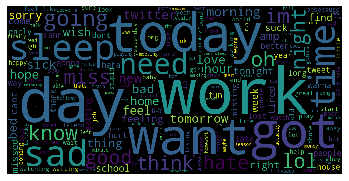

In [99]:
wc =WordCloud(width=1000, height=500).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

### Spelling Correction

In [100]:
from textblob import TextBlob

In [101]:
x2 ="thenks forr coming todky"

In [102]:
x2 = TextBlob(x2).correct()
x2

TextBlob("thanks for coming today")

### Tokenization

In [103]:
x2 ="The truth is i am iron man"

In [104]:
x2 = TextBlob(x2).words
x2

WordList(['The', 'truth', 'is', 'i', 'am', 'iron', 'man'])

### Lemmatization

In [105]:
x =" run running runs ran"

In [106]:
from textblob import TextBlob, Word

In [107]:
for token in x.split():
    print(Word(token).lemmatize())

run
running
run
ran


In [108]:
doc =nlp(x)

for token in doc:
    print(token.lemma_)

 
run
run
run
run


### detecting entities using NER and Spacy

In [109]:
x= "Breaking News: Donald Trump, the president of USA is looking to sign the deal to dig mine in moon"

In [110]:
doc =nlp(x)

for ent in doc.ents:
    print(ent.text + ' _ ' + ent.label_ + ' _ ' +str(spacy.explain(ent.label_)))

Donald Trump _ PERSON _ People, including fictional
USA _ GPE _ Countries, cities, states


In [111]:
from spacy import displacy

In [112]:
displacy.render(doc, style='ent')

### Detecting nouns

In [113]:
for noun in doc.noun_chunks:
    print(noun)

Breaking News
Donald Trump
the president
USA
the deal
mine
moon


### Translation and Language Detection

Language code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [114]:
x

'Breaking News: Donald Trump, the president of USA is looking to sign the deal to dig mine in moon'

In [115]:
tb =TextBlob(x)

In [116]:
tb.detect_language()

'en'

In [117]:
tb.translate(to="zh")

TextBlob("最新消息：美国总统唐纳德·特朗普（Donald Trump）希望签署在月球上挖矿的协议")

### Use inbuilt Classifier

In [118]:
from textblob.sentiments import NaiveBayesAnalyzer

In [119]:
x= "we will win this match if we worked as team"

In [120]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [121]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.6229674995543816, p_neg=0.3770325004456186)

### Advanced Text processing

#### N-Grams

In [122]:
x= "The truth is Im ironman"

In [123]:
tb =TextBlob(x)

In [124]:
tb.ngrams(4)

[WordList(['The', 'truth', 'is', 'Im']),
 WordList(['truth', 'is', 'Im', 'ironman'])]

### Bag of words

In [125]:
x=[ " This is first sentence", "this is second", "this is third"]

In [126]:
from sklearn.feature_extraction.text import CountVectorizer

In [127]:
cv =CountVectorizer(ngram_range=(1,1))
text_counts =cv.fit_transform(x)

In [128]:
text_counts

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [129]:
text_counts.toarray()

array([[1, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 1, 1]], dtype=int64)

In [130]:
bow =pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())
bow

,first,is,second,sentence,third,this
0,1,1,0,1,0,1
1,0,1,1,0,0,1
2,0,1,0,0,1,1


### Term Frequency

TF is the ratio of the count of the words present in the sentence, to the length of the sentence

In [131]:
bow

,first,is,second,sentence,third,this
0,1,1,0,1,0,1
1,0,1,1,0,0,1
2,0,1,0,0,1,1


In [132]:
bow.shape

(3, 6)

In [133]:
tf =bow.copy()

In [134]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col] /sum(row[1].values)

In [135]:
tf

,first,is,second,sentence,third,this
0,0.25,0.250000,0.000000,0.25,0.000000,0.250000
1,0.00,0.333333,0.333333,0.00,0.000000,0.333333
2,0.00,0.333333,0.000000,0.00,0.333333,0.333333


### Inverse Document Frequency (IDF) 
in information science and statistics, is a method of determining the frequency of a word within a data set of texts. 
In combination with the Within Document Frequency, the Inverse Document Frequency helps to create unique content and may even replace keyword density as a quality score 
which has been used for a long time to determine text quality.


TF(w) = (Number of times term w appears in a document) / (Total number of terms in the document)

IDF(w) = log_e(Total number of documents / Number of documents with term w in it)

idf = log((1+N)/ (n+1)) + 1 used in sklearn smooth_idf = True

N - Total no.of rows 

n - Total no.of rows in which word was present

In [136]:
import numpy as np

In [139]:
x_df =pd.DataFrame(x, columns=['words'])
x_df

,words
0,This is first sentence
1,this is second
2,this is third


In [140]:
bow

,first,is,second,sentence,third,this
0,1,1,0,1,0,1
1,0,1,1,0,0,1
2,0,1,0,0,1,1


In [141]:
N =bow.shape[0]
N

3

In [142]:
bb =bow.astype("bool")
bb

,first,is,second,sentence,third,this
0,True,True,False,True,False,True
1,False,True,True,False,False,True
2,False,True,False,False,True,True


In [144]:
bb.columns

Index(['first', 'is', 'second', 'sentence', 'third', 'this'], dtype='object')

In [151]:
count_word =[]

for i in bb.columns:
    x = bb[i].sum()
    print(i," ", x)
    count_word.append(x)

first   1
is   3
second   1
sentence   1
third   1
this   3


In [152]:
count_word

[1, 3, 1, 1, 1, 3]

In [153]:
idf =[]

for index, col in enumerate(bb.columns):
    idf.append( np.log ((N+1) / (count_word[index]+1)) +1)

In [154]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [155]:
bow

,first,is,second,sentence,third,this
0,1,1,0,1,0,1
1,0,1,1,0,0,1
2,0,1,0,0,1,1


### TF - IDF

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [160]:
tfidf =TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df["words"])

In [161]:
x_tfidf.toarray()

array([[0.6088451 , 0.35959372, 0.        , 0.6088451 , 0.        ,
        0.35959372],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.        , 0.        , 0.76749457,
        0.45329466]])

In [164]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [165]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

### Word embedding

#### Spacy 'Word2Vec'

In [166]:
nlp =spacy.load("en_core_web_lg")

In [177]:
doc =nlp("thank you! god dog cat fee djbvkjdb")

In [178]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
god True
dog True
cat True
fee True
djbvkjdb False


In [179]:
token.vector,  token.vector.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [180]:
nlp("dog").vector, nlp("dog").vector.shape

(array([-4.0176e-01,  3.7057e-01,  2.1281e-02, -3.4125e-01,  4.9538e-02,
         2.9440e-01, -1.7376e-01, -2.7982e-01,  6.7622e-02,  2.1693e+00,
        -6.2691e-01,  2.9106e-01, -6.7270e-01,  2.3319e-01, -3.4264e-01,
         1.8311e-01,  5.0226e-01,  1.0689e+00,  1.4698e-01, -4.5230e-01,
        -4.1827e-01, -1.5967e-01,  2.6748e-01, -4.8867e-01,  3.6462e-01,
        -4.3403e-02, -2.4474e-01, -4.1752e-01,  8.9088e-02, -2.5552e-01,
        -5.5695e-01,  1.2243e-01, -8.3526e-02,  5.5095e-01,  3.6410e-01,
         1.5361e-01,  5.5738e-01, -9.0702e-01, -4.9098e-02,  3.8580e-01,
         3.8000e-01,  1.4425e-01, -2.7221e-01, -3.7016e-01, -1.2904e-01,
        -1.5085e-01, -3.8076e-01,  4.9583e-02,  1.2755e-01, -8.2788e-02,
         1.4339e-01,  3.2537e-01,  2.7226e-01,  4.3632e-01, -3.1769e-01,
         7.9405e-01,  2.6529e-01,  1.0135e-01, -3.3279e-01,  4.3117e-01,
         1.6687e-01,  1.0729e-01,  8.9418e-02,  2.8635e-01,  4.0117e-01,
        -3.9222e-01,  4.5217e-01,  1.3521e-01, -2.8

In [183]:
doc =nlp("thank you! god dog cat fee")

In [184]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()

thank thank 1.0
thank you 0.5647585
thank ! 0.52147406
thank god 0.43260184
thank dog 0.2504265
thank cat 0.20648485
thank fee 0.13732219

you thank 0.5647585
you you 1.0
you ! 0.4390223
you god 0.40283912
you dog 0.36494097
you cat 0.3080798
you fee 0.3219054

! thank 0.52147406
! you 0.4390223
! ! 1.0
! god 0.32640293
! dog 0.29852203
! cat 0.29702348
! fee 0.17867495

god thank 0.43260184
god you 0.40283912
god ! 0.32640293
god god 1.0
god dog 0.28697583
god cat 0.2928083
god fee 0.110236555

dog thank 0.2504265
dog you 0.36494097
dog ! 0.29852203
dog god 0.28697583
dog dog 1.0
dog cat 0.80168545
dog fee 0.1868649

cat thank 0.20648485
cat you 0.3080798
cat ! 0.29702348
cat god 0.2928083
cat dog 0.80168545
cat cat 1.0
cat fee 0.13496551

fee thank 0.13732219
fee you 0.3219054
fee ! 0.17867495
fee god 0.110236555
fee dog 0.1868649
fee cat 0.13496551
fee fee 1.0



### Machine learning models for Text Classification

In [187]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts,URL_flag
0,switchfoot httptwitpiccom2y1zl awww bummer sho...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad bebecause,0,21,111,4.285714,10,0,1,0,1,[],0,0


In [186]:
df.shape

(1600000, 13)

In [188]:
df0 =df[df['sentiment'] == 0].sample(3000)
df1 =df[df['sentiment'] == 4].sample(3000)

In [190]:
dfr = df0.append(df1, ignore_index = True)

In [191]:
dfr.shape

(6000, 13)

In [192]:
dfr.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts,URL_flag
0,shazkitten awful,0,10,56,4.600000,3,0,1,0,0,[],0,0
1,hates learning,0,2,15,6.500000,0,0,0,0,0,[],0,0
2,womens studies ruined music little bit,0,7,43,5.142857,1,0,0,0,0,[],0,0
3,upset weather nasty gross canton probably gunn...,0,22,111,4.045455,12,0,0,0,0,[],0,0
4,found beloved doggie early stage kidney failur...,0,15,82,4.400000,5,0,0,0,0,[],0,0


In [194]:
dfr_feat =dfr.drop(["twitts","sentiment","email"], axis=1)
dfr_feat.head()

,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email_counts,URL_flag
0,10,56,4.600000,3,0,1,0,0,0,0
1,2,15,6.500000,0,0,0,0,0,0,0
2,7,43,5.142857,1,0,0,0,0,0,0
3,22,111,4.045455,12,0,0,0,0,0,0
4,15,82,4.400000,5,0,0,0,0,0,0


In [195]:
y =dfr["sentiment"]

In [196]:
from sklearn.feature_extraction.text import CountVectorizer

In [199]:
cv = CountVectorizer()
text_counts =cv.fit_transform(dfr['twitts'])

In [200]:
text_counts.toarray().shape

(6000, 13347)

In [203]:
dfr_blog =pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())
dfr_blog.head()

,00,0107,0110,012005,02was,0330,0430,06,0810,09,...,zoon,zoras,zshare,zuhaib,zulu,zune,zydratefairy,zzz,zzzzs,zzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ML Algorithms

In [205]:
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [207]:
SGD =SGDClassifier(n_jobs=-1, max_iter=200, random_state=42)
LR =LogisticRegression( max_iter=200, random_state=42)

LRcv =LogisticRegressionCV(cv=2, max_iter=200, random_state=42)
SVM =LinearSVC( max_iter=200, random_state=42)

RF_class =RandomForestClassifier(n_jobs=-1, n_estimators=200, random_state=42)

In [208]:
clf ={"SGD": SGD,  "LR":LR,  "LRcv":LRcv, "SVM":SVM, "RF_class":RF_class  }

In [209]:
clf.keys()

dict_keys(['SGD', 'LR', 'LRcv', 'SVM', 'RF_class'])

In [214]:
def classify(X, y):
    scaler =MinMaxScaler(feature_range=(0,1))
    X =scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred =clf[key].predict(X_test)
        ac =accuracy_score(y_test, y_pred)
        print(key, "---->", ac)

In [216]:
classify(dfr_blog, y)

SGD ----> 0.6616666666666666


C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR ----> 0.6841666666666667


C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LRcv ----> 0.6933333333333334
SVM ----> 0.6675
RF_class ----> 0.6583333333333333


###  Manual Feature

In [217]:
classify(dfr_feat, y)

SGD ----> 0.585
LR ----> 0.5791666666666667


C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LRcv ----> 0.5825
SVM ----> 0.5816666666666667
RF_class ----> 0.5275


### Manual + Bow

In [218]:
X =dfr_feat.join(dfr_blog)
X.head()

,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email_counts,URL_flag,...,zoon,zoras,zshare,zuhaib,zulu,zune,zydratefairy,zzz,zzzzs,zzzzz
0,10,56,4.600000,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,15,6.500000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,43,5.142857,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,111,4.045455,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,82,4.400000,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
classify(X, y)

SGD ----> 0.6658333333333334


C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR ----> 0.6875
LRcv ----> 0.6858333333333333
SVM ----> 0.6666666666666666
RF_class ----> 0.645


### TF-IDF

In [220]:
dfr.shape

(6000, 13)

In [221]:
dfr.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,#hash_counts,@mentions_counts,numeric_counts,upper_counts,email,email_counts,URL_flag
0,shazkitten awful,0,10,56,4.600000,3,0,1,0,0,[],0,0
1,hates learning,0,2,15,6.500000,0,0,0,0,0,[],0,0
2,womens studies ruined music little bit,0,7,43,5.142857,1,0,0,0,0,[],0,0
3,upset weather nasty gross canton probably gunn...,0,22,111,4.045455,12,0,0,0,0,[],0,0
4,found beloved doggie early stage kidney failur...,0,15,82,4.400000,5,0,0,0,0,[],0,0


In [222]:
tfidf =TfidfVectorizer()
x_tfidf = tfidf.fit_transform(dfr["twitts"])

In [224]:
classify(pd.DataFrame(x_tfidf.toarray()), y)

SGD ----> 0.6566666666666666


C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR ----> 0.6833333333333333
LRcv ----> 0.6891666666666667
SVM ----> 0.66
RF_class ----> 0.66


### Word2Vec

In [226]:
def get_vec(x):
    doc =nlp(x)
    return doc.vector.reshape(1, -1)

In [227]:
dfr['vec'] =dfr['twitts'].apply(lambda x: get_vec(x))

In [228]:
X =np.concatenate(dfr['vec'].to_numpy(), axis=0)

In [229]:
X

array([[-0.178855  ,  0.06612   , -0.063145  , ..., -0.01211   ,
         0.00233695,  0.049624  ],
       [-0.1971895 ,  0.0389735 , -0.249015  , ...,  0.13633001,
        -0.06661604,  0.333655  ],
       [-0.140197  ,  0.13676167, -0.08969266, ...,  0.09955733,
        -0.06122628,  0.01063884],
       ...,
       [ 0.06095725,  0.10713825, -0.3228125 , ..., -0.1720175 ,
        -0.05917499,  0.08998749],
       [-0.09987583, -0.0158655 ,  0.05341701, ..., -0.2620489 ,
         0.07665091,  0.10475234],
       [ 0.01923486,  0.02448332,  0.13383417, ..., -0.11757267,
         0.0443605 ,  0.23076327]], dtype=float32)

In [230]:
X.shape

(6000, 300)

In [231]:
classify(pd.DataFrame(X), y)

SGD ----> 0.7016666666666667


C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR ----> 0.715


C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of

LRcv ----> 0.71


C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM ----> 0.695
RF_class ----> 0.68


In [232]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred =clf[key].predict(get_vec(x))
        print(key, "--->", y_pred)

In [236]:
predict_w2v("i don't like this")

SGD ---> [0]
LR ---> [0]
LRcv ---> [0]
SVM ---> [0]
RF_class ---> [0]


In [237]:
predict_w2v("Thanks for your help")

SGD ---> [4]
LR ---> [4]
LRcv ---> [0]
SVM ---> [4]
RF_class ---> [0]


In [247]:
predict_w2v("Congratulations, you are doing good")

SGD ---> [4]
LR ---> [4]
LRcv ---> [0]
SVM ---> [4]
RF_class ---> [0]
